# Predicting heart disease using ML

Using standard libraries to build a ML model to predict whether a person has heart disease based on their medical attributes.

Framework:
1. Defining the problem
2. Data
3. Evaluation Metrics
4. Feature selection
5. Modelling
6. Additional Experimentation

## 1. Defining the problem
Problem statement:
> Given clinical parameters about a patient, Can we predict if they have heart disease?

## 2. Data
The original data has been curated from [UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/45/heart+disease)

## 3. Evaluation Metrics
> If we can achieve 95% accuracy at predicting heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# !conda update scikit-learn

In [39]:
# Regular EDA and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Seeding Numpy
np.random.seed(42)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score # accuracy default
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv('./data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA
### Understanding the nature of the data

In [4]:
shape = df.shape
features = df.columns

print(f"Our data has a shape of {shape}")
print(f"our data contains the following features \n {features}")

Our data has a shape of (303, 14)
our data contains the following features 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


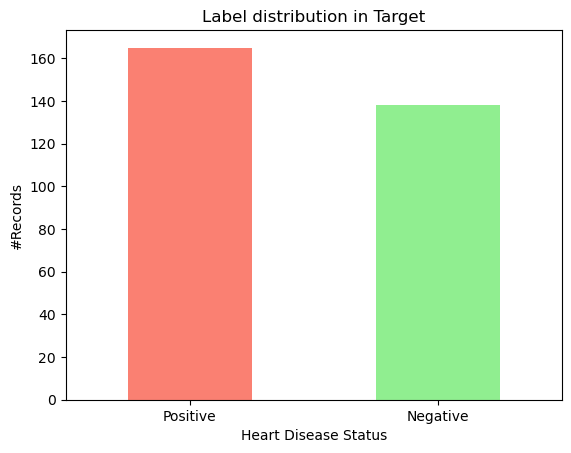

In [9]:
# Let's see how many records we have for each of the labels
df["target"].value_counts().plot(kind="bar", color = ["salmon", "lightgreen"], )
plt.title("Label distribution in Target")
plt.xlabel("Heart Disease Status")
plt.xticks([0,1],["Positive", "Negative"], rotation=0)
plt.ylabel("#Records");

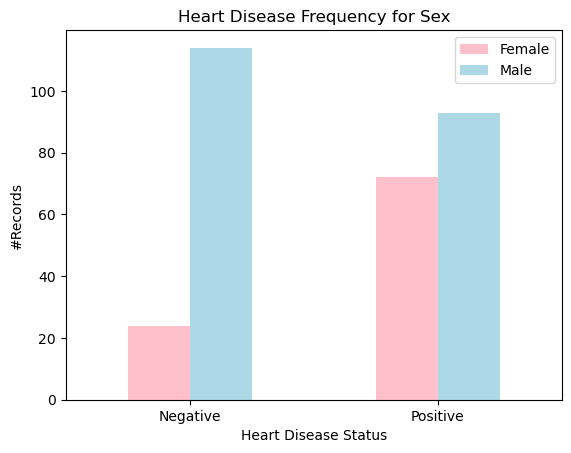

In [10]:
# compare target column with sex column
pd.crosstab(df.target, df.sex).plot(kind='bar', color = ['pink','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease Status")
plt.xticks([0,1],["Negative","Positive"], rotation=0)
plt.ylabel("#Records")
plt.legend(["Female","Male"]);

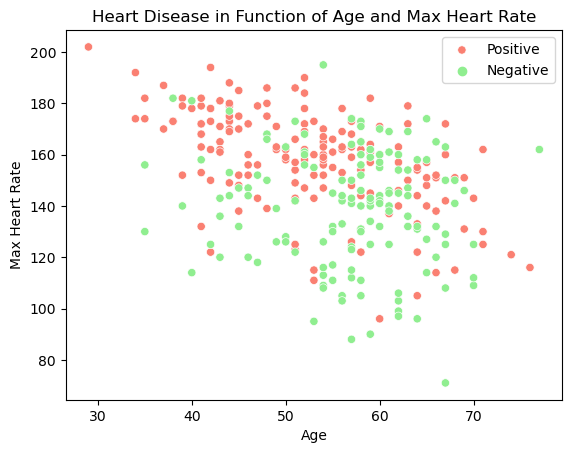

In [11]:
sns.scatterplot(data=df,x='age', y='thalach',
               hue='target', palette = ['lightgreen',"salmon"])
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["Positive","Negative"]);

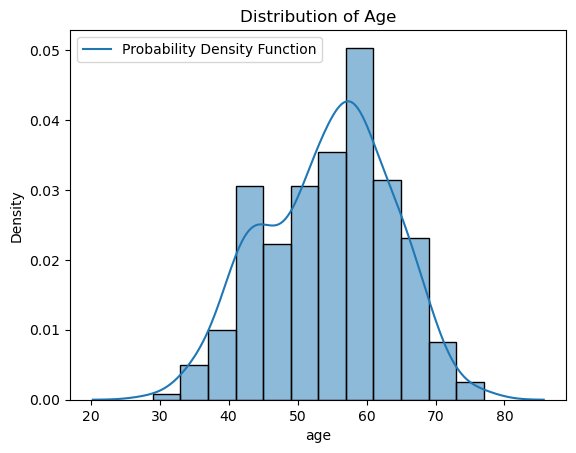

In [12]:
sns.histplot(data = df, x = 'age', kde = True,  kde_kws = dict(cut=3), stat="density").legend(["Probability Density Function"])
plt.title("Distribution of Age");

### Heart Disease Frequence per Chest Pain Type
__cp - chest pain type__
    
  + 0: Typical angina: chest pain related decrease blood supply to the heart
  + 1: Atypical angina: chest pain not related to heart
  + 2: Non-anginal pain: typically esophageal spasms (non heart related)
  + 3: Asymptomatic: chest pain not showing signs of disease

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


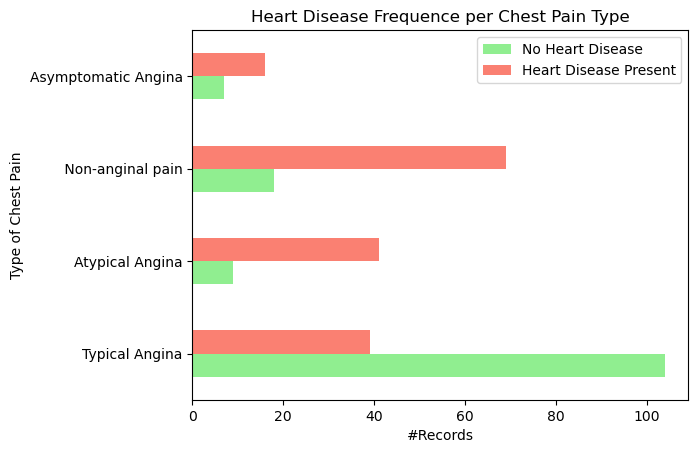

In [14]:
pd.crosstab(df.cp, df.target).plot(kind='barh', color=['lightgreen','salmon'])
plt.ylabel('Type of Chest Pain')
plt.yticks(ticks = [0, 1, 2, 3],
           labels=["Typical Angina", "Atypical Angina", " Non-anginal pain", "Asymptomatic Angina"])
plt.xlabel('#Records')
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.title('Heart Disease Frequence per Chest Pain Type');

In [15]:
pd.crosstab(df.cp, df.exang)

exang,0,1
cp,,
0,63,80
1,46,4
2,76,11
3,19,4


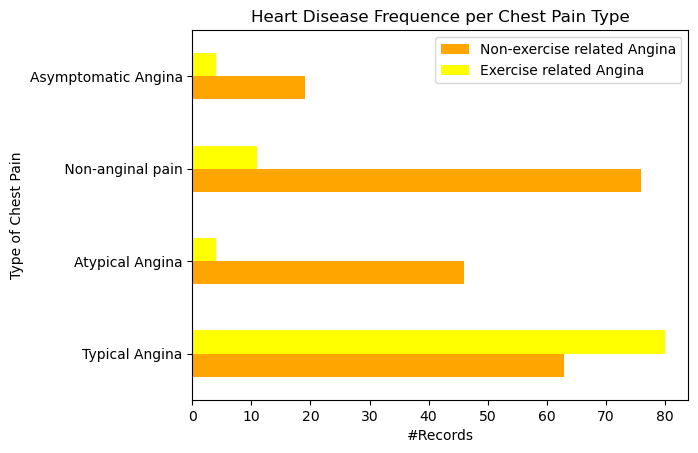

In [16]:
pd.crosstab(df.cp, df.exang).plot(kind='barh', color=['orange','yellow'])
plt.ylabel('Type of Chest Pain')
plt.yticks(ticks = [0, 1, 2, 3],
           labels=["Typical Angina", "Atypical Angina", " Non-anginal pain", "Asymptomatic Angina"])
plt.xlabel('#Records')
plt.legend(["Non-exercise related Angina", "Exercise related Angina"])
plt.title('Heart Disease Frequence per Chest Pain Type');

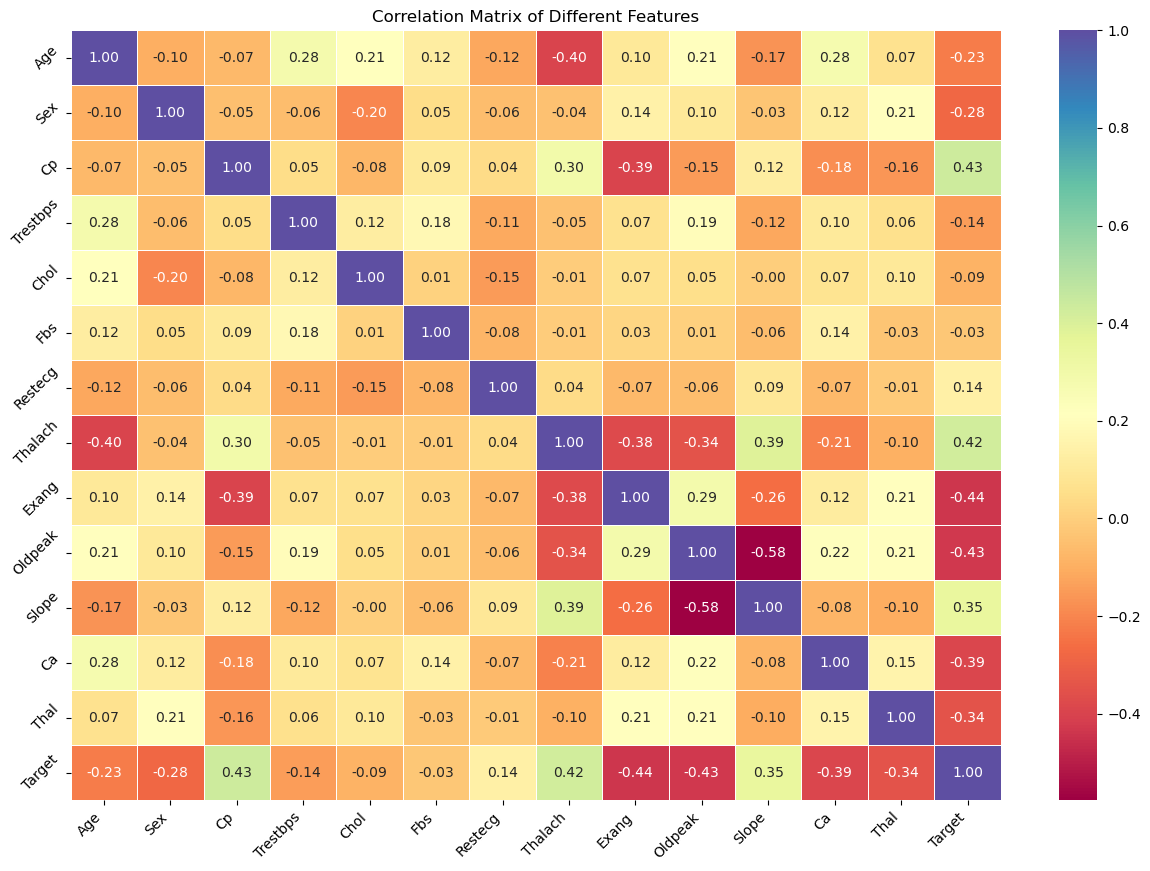

In [17]:
# Make a correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix, annot = True,
                linewidth = 0.5, fmt = ".2f",
                 cmap = "Spectral")

plt.title("Correlation Matrix of Different Features")
ax.set_xticklabels([f.title() for f in features], rotation=45, ha='right')
ax.set_yticklabels([f.title() for f in features], rotation=45, ha='right');
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right'); #Another Way

## Modelling

In [18]:
# Split into X & y
X = df.drop("target", axis=1)
y = df.target

# Three set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

__Models we are going to use:__
    
    1. Logistic Regression
    2. K Neighbors Classifier
    3. Ensemble Classifier (Random Forest)

In [19]:
# Model Dictionary
models = {
    "LogReg": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RFC": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluates given Machine Learning Model.
    models : a dict of different scikit-learn machine learning models.
    X_train : Training Data (No Labels)
    X_test : Testing Data (No Labels)
    y_train : Training Labels
    y_test : Testing Labels
    """
    
    # Setting up a random seed
    np.random.seed(42)
    
    # Model scores dictionary
    model_scores = {}
    
    # Looping through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        #Evaluate the model and note the score
        model_scores[name] = model.score(X_test, y_test) # Default : Accuracy
    
    return model_scores

In [20]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

{'LogReg': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

### Model Comparison

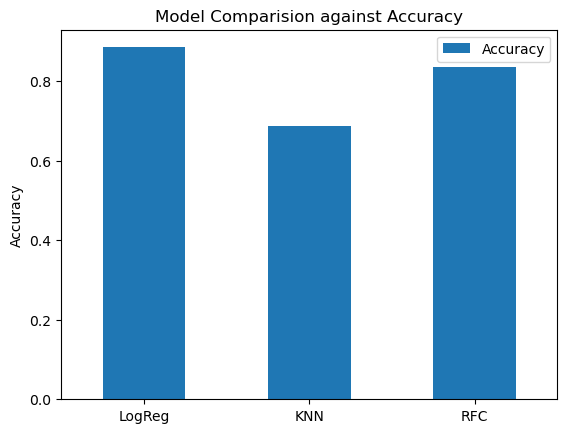

In [21]:
model_comparison = pd.DataFrame(model_scores, index = ["Accuracy"])
model_comparison.T.plot(kind='bar')
plt.title("Model Comparision against Accuracy")
plt.xticks(rotation=0)
plt.ylabel("Accuracy");

Baseline model has obtained. Now, it's time for experimentation. We know that first prediction aren't alway what we should based our next steps off.

Let's investigate the following:

   + Hyperparameter Tuning
   + Feature Importance
   + Confusion Matrix
   + Cross Validation
   + Precision
   + Recall
   + F1 score
   + Classification Report
   + ROC Curve
   + AUC

## Hyperparameter Tuning

In [22]:
# Tuning KNN
train_scores = []
test_scores = []

# list of different values for n_neighbors
n_neighbors = range(1,21)

# KNN Instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in n_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vuban\anaconda3\envs\heart\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

Maximum KNN score on the test data: 75.41%


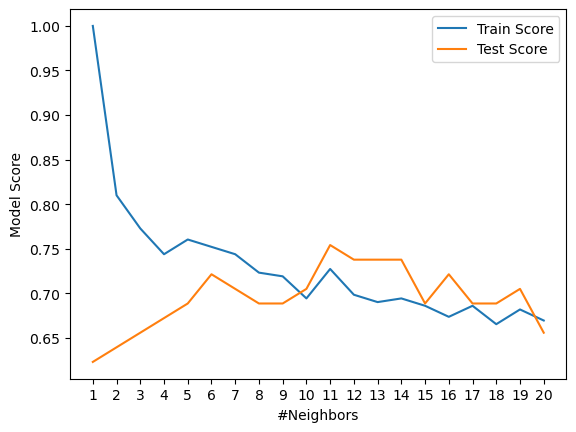

In [23]:
plt.plot(n_neighbors, train_scores, label = "Train Score")
plt.plot(n_neighbors, test_scores, label = "Test Score")
plt.xlabel("#Neighbors")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

__Discarding KNN as the other models are visibly performing better.__

## Hyperparameter Tuning using RandomizedSearchCV

we're going to tune

    1. Logistic Regression
    2. Random Forest CLassifier

In [24]:
# Create a hyper parameter grid for Logistic Regression
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20),
    "solver" : ["liblinear"]
}

# Create a hyperparameter grid for RandomForestClassifier
rfc_grid = {
    "n_estimators" : np.arange(10,1500,50),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)    
}

Now we have hyperparameter grids setup for each of our models.
Let's tune them using RandomizedSearchCV

In [25]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20, # total number of combinations to run
                                verbose = True
                               )
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [27]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

`LogisticRegression()` has been optimized.

Now, let's optimize `RandomForestClassifier()`

In [28]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier 
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rfc_grid,
                            cv = 5,
                            n_iter = 20, # randomly try 20 combinations
                            verbose = True
                           )

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1210, 1260, 1310, 1360, 1410, 1460])},
                   verbose=True)

In [29]:
rs_rfc.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
rs_rfc.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with `GridSearchCV`

In [34]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = {
                            "solver" : ["liblinear"],
                            "C" : np.logspace(-1.5, 1, 100)
                         },
                         cv = 5,
                         verbose = True)

# Fit Grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 0.03162278,  0.03351603,  0.03552262,  0.03764936,  0.03990342,
        0.04229243,  0.04482447,  0.0475081 ,  0.0503524 ,  0.05336699,
        0.05656206,  0.05994843,  0.06353753,  0.06734151,  0.07137323,
        0.07564633,  0.08017526,  0.08497534,  0.0900628 ,  0.09545485,
        0.10116971,  0.10722672,  0.11364637,  0.12045035,  0.12766169,
        0.1353...
        1.85215261,  1.96304065,  2.08056754,  2.20513074,  2.33715152,
        2.47707636,  2.62537847,  2.7825594 ,  2.94915073,  3.12571585,
        3.31285189,  3.51119173,  3.72140615,  3.94420606,  4.18034496,
        4.43062146,  4.69588196,  4.97702356,  5.27499706,  5.59081018,
        5.92553098,  6.28029144,  6.65629135,  7.05480231,  7.47717205,
        7.92482898,  8.39928706,  8.90215085,  9.43512101, 10.        ]),
                         'solver': ['liblinear']},
             verbose=True)

In [35]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [36]:
gs_log_reg.best_params_

{'C': 0.22834203047182716, 'solver': 'liblinear'}

## Evaluating our tuned machine learning classifier beyond accuracy

    * ROC curve and AUC score
    * Confusion Matrix
    * Classification Report
    * Precision
    * Recall
    * F1-Score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [37]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_probs = gs_log_reg.predict_proba(X_test)[:,-1]

In [121]:
# def plot_roc_curve(fpr, tpr, roc_auc, model_name="Model's"):
#     """
#     Plot the ROC curve.

#     Parameters:
#         fpr (array-like): False Positive Rate.
#         tpr (array-like): True Positive Rate.
#         roc_auc (float): Area Under the ROC Curve (AUC).

#     Returns:
#         None
#     """

#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:0.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc='lower right')

#     # Add grid lines and style adjustments
#     plt.grid(color='gray', linestyle='--', linewidth=0.5)
#     plt.tick_params(axis='both', which='both', labelsize=12)
#     plt.axhline(0.5, color='gray', linestyle='--', lw=1)
#     plt.axvline(0.5, color='gray', linestyle='--', lw=1)

#     plt.show()

In [122]:
# # Calculate ROC curve
# fpr, tpr, _ = roc_curve(y_test, y_probs)
# roc_auc = auc(fpr, tpr)

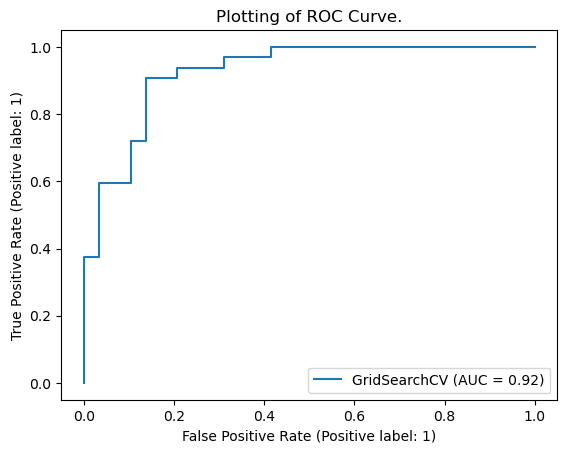

In [41]:
# plot_roc_curve(fpr, tpr, roc_auc, "Logistic Regression")
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title("Plotting of ROC Curve.");

In [42]:
def confusion_matrix_plot(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's Hearmap.
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    
    plt.ylabel("Predicted Label")

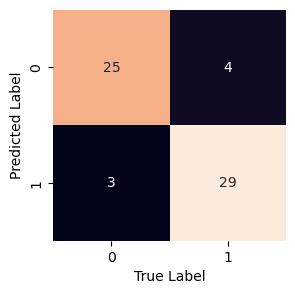

In [43]:
confusion_matrix_plot(y_test, y_preds)

Now we have got a ROC curve, an AUC metric and a Confusion Matrix, let's get a Classification Report as well as cross-validated precison, recall and f1-score.

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

we're going to calculate precision , recall and f1-score of our model using cross-validation and to do so we'll be using cross-validation and to do so we'll be using `cross_val_score`

In [45]:
## Check best hyper params
gs_log_reg.best_params_

{'C': 0.22834203047182716, 'solver': 'liblinear'}

In [46]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.22834203047182716, 
                         solver = 'liblinear')


In [47]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, 
                        cv = 5,
                        scoring='accuracy')
cv_acc.mean()

0.8479781420765027

In [48]:
# Cross validated precision
cv_precision = cross_val_score(clf, X, y, 
                        cv = 5,
                        scoring='precision')
cv_precision.mean()

0.8215873015873015

In [49]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, y, 
                        cv = 5,
                        scoring='recall')
cv_recall.mean()

0.9272727272727274

In [50]:
# Cross validated f1
cv_f1 = cross_val_score(clf, X, y, 
                        cv = 5,
                        scoring='f1')
cv_f1.mean()

0.8705403543192143

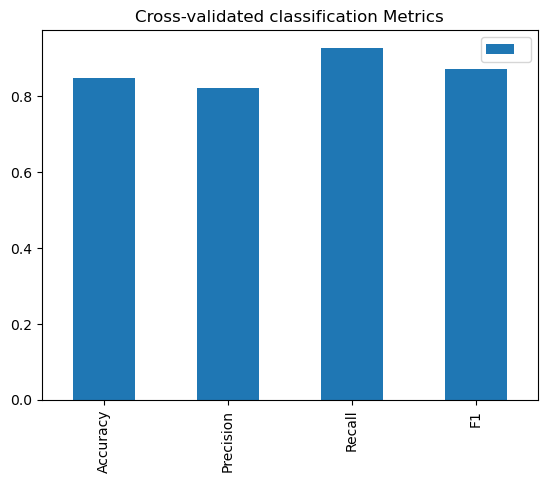

In [51]:
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc.mean(),
                           "Precision" : cv_precision.mean(),
                           "Recall" : cv_recall.mean(),
                           "F1" : cv_f1.mean()}, 
                          index=[''])
 
cv_metrics.T.plot.bar(title = "Cross-validated classification Metrics",
                      legend = "False");

### Feature Importance

Which features contributed most to the outcoomeds of the model?

In [61]:
clf = LogisticRegression(C = 0.22834203047182716, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.22834203047182716, solver='liblinear')

In [72]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036183093437834237,
 'sex': -0.8989934738442893,
 'cp': 0.6725148034418061,
 'trestbps': -0.0115961375496032,
 'chol': -0.0017014740704174188,
 'fbs': 0.048112623480277165,
 'restecg': 0.3294179718466186,
 'thalach': 0.024722741650359547,
 'exang': -0.62757704836616,
 'oldpeak': -0.574365336977065,
 'slope': 0.4676783417749511,
 'ca': -0.6484041724687631,
 'thal': -0.6940618419439285}

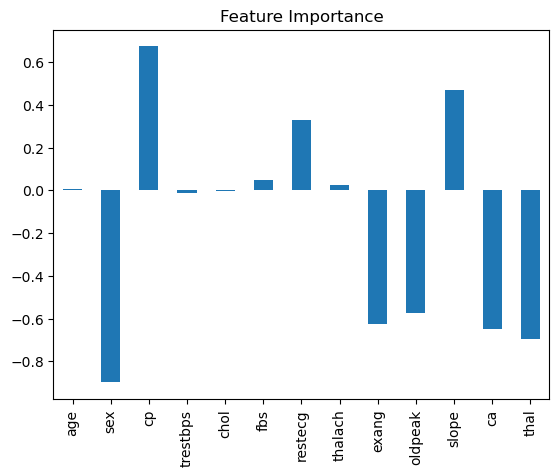

In [69]:
feature_dict = pd.DataFrame(feature_dict, index = [0])
feature_dict.T.plot.bar(title = "Feature Importance", legend = False);

In [70]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [71]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

## Experimentation

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


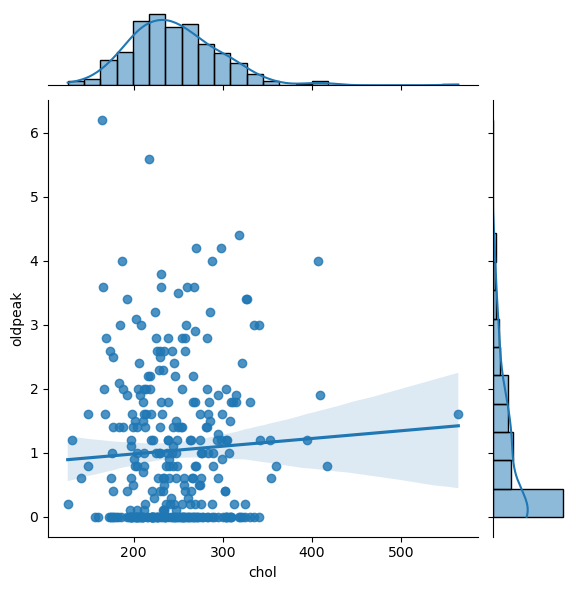

In [88]:
sns.jointplot(data=df, x ='chol', y = 'oldpeak', kind = 'reg')

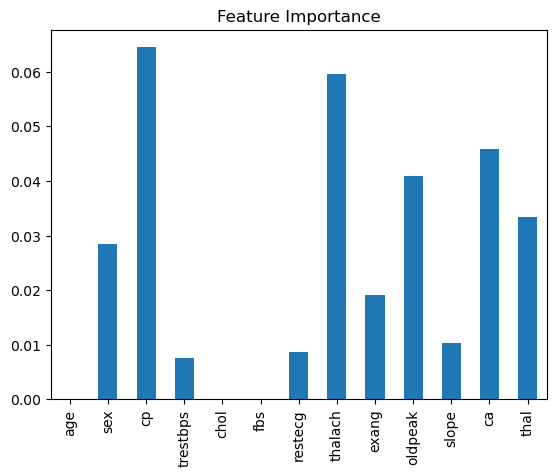

In [104]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

# Extract and display feature importances
importance = result.importances_mean
feature_names = X.columns  # Assuming X is a DataFrame with column names
sorted_idx = np.argsort(importance)

permutation_importance = pd.DataFrame(zip(feature_names, importance))
permutation_importance.plot.bar(title = "Feature Importance", legend = False)
plt.xticks(range(13),feature_names);

In [105]:
from skimpy import skim
skim(df)

ModuleNotFoundError: No module named 'skimpy'

In [110]:
from skimpy import skim

skim(df)

usage: conda-script.py [-h] [--no-plugins] [-V] COMMAND ...
conda-script.py: error: unrecognized arguments: --user


""
